In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

path = "/content/gdrive/MyDrive/Euron/"

Mounted at /content/gdrive/


# 2.6 실습(타이타닉 생존자 예측)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
titanic_df=pd.read_csv(path+'titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
# Age, Cabin, Embarked 칼럼 - Null 값을 대체함
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수 ', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수  0


<ipython-input-30-1432af77dae6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
<ipython-input-30-1432af77dae6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
print('Sex 값 분포:\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포:\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포:\n', titanic_df['Embarked'].value_counts())


Sex 값 분포:
 Sex
male      577
female    314
Name: count, dtype: int64

 Cabin 값 분포:
 Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

 Embarked 값 분포:
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [ ]:
# Cabin 값이 정리되지 않음
# => 선실 등급 나타내는 첫 번째 알파벳 추출함
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [ ]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()
# 레이블(결정 class) 값: Survived

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

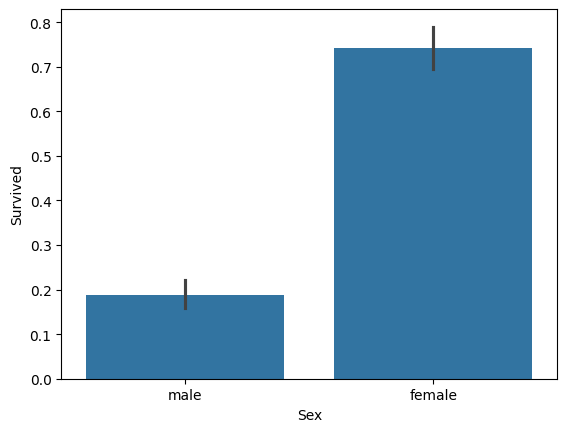

In [ ]:
# 성별에 따른 생존율
sns.barplot(x='Sex', y='Survived', data=titanic_df)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Pclass', ylabel='Survived'>

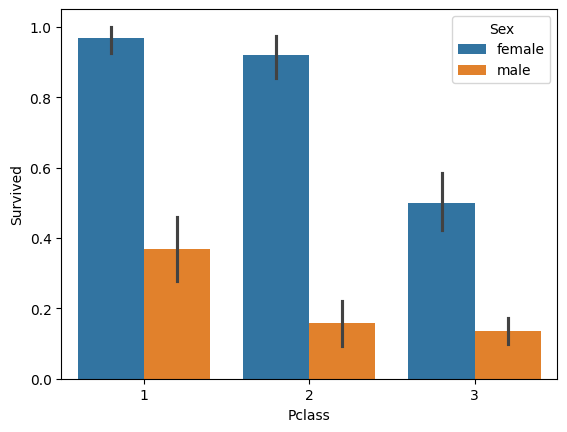

In [ ]:
# 객실 등급별 성별에 따른 생존율
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

In [ ]:
# 여성: 1,2 등실의 생존확률은 차이가 많이 나지 않음. 3등실의 생존율은 급감함
# 남성: 1등실의 생존율이 2,3등실의 생존율보다 높음.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


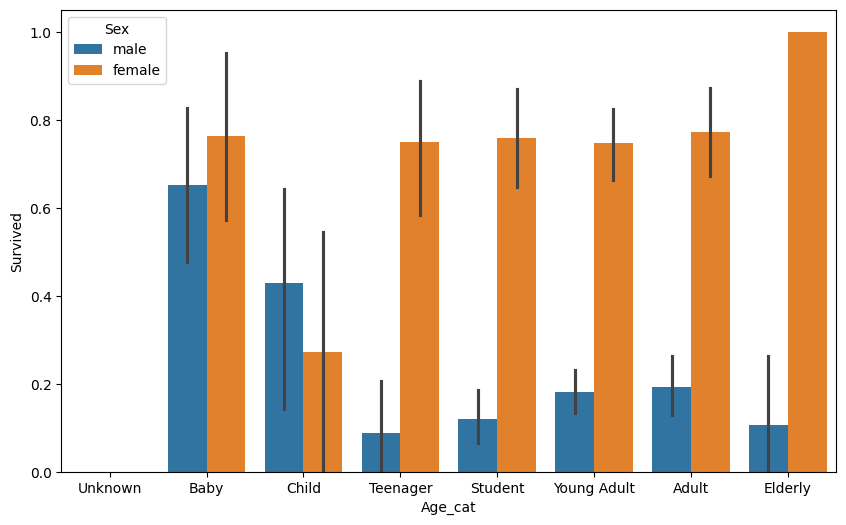

In [ ]:
# 나이에 따른 생존율

def get_category(age):      # 나이에 따라 구분 값 반환하는 함수
  cat=''
  if age<=-1: cat='Unknown'
  elif age<=5: cat='Baby'
  elif age<=12: cat='Child'
  elif age<=18: cat='Teenager'
  elif age<=25: cat='Student'
  elif age<=35: cat='Young Adult'
  elif age<=60: cat='Adult'
  else: cat='Elderly'

  return cat

# 막대그래프 크기 figure 더 크게 설정
plt.figure(figsize=(10,6))

# X축 값을 순차적으로 표시
group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

# lambda식에 get_category()를 반환값으로 지정
# get_category(x)는 입력값으로 'Age' 칼럼 값 받고 해당 cat 반환
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x:get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [ ]:
# 여자 Baby, Elderly 생존율 높음
# 여자 Child의 생존율은 다른 group에 비해 낮음

In [ ]:
from sklearn import preprocessing

def encode_features(dataDF):
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le=preprocessing.LabelEncoder()
    le=le.fit(dataDF[feature])
    dataDF[feature]=le.transform(dataDF[feature])

  return dataDF
# LabelEncoder: 숫자 값으로 변환(0 ~ (카테고리 값의 유형 수 - 1))

titanic_df=encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2


데이터 전처리

In [ ]:
# Null 처리
def fillna(df):
  df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
  return df

# 레이블 인코딩 수행
def format_features(df):
  df['Cabin']=df['Cabin'].str[:1]
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le=preprocessing.LabelEncoder()
    le=le.fit(df[feature])
    df[feature]=le.transform(df[feature])
  return df

# 데이터 전처리 함수 호출
def transform_features(df):
  df=fillna(df)
  df=drop_features(df)
  df=format_features(df)
  return df

In [ ]:
# 데이터 재로딩
titanic_df=pd.read_csv(path+'titanic_train.csv')

# 피처/레이블 데이터 세트 추출
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived', axis=1)

X_titanic_df=transform_features(X_titanic_df)

<ipython-input-42-faec59c5bb38>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
<ipython-input-42-faec59c5bb38>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

train/test data split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                      test_size=0.2, random_state=11)

모델 학습(fit) / 예측(predict)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 사이킷런 Classifier 클래스 생성
dt_clf=DecisionTreeClassifier(random_state=11)
rf_clf=RandomForestClassifier(random_state=11)
lr_clf=LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred=dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0: .4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred=rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0: .4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred=lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0: .4f}'.format(accuracy_score(y_test, lr_pred)))


DecisionTreeClassifier 정확도:  0.7877
RandomForestClassifier 정확도:  0.8547
LogisticRegression 정확도:  0.8492


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


교차 검증을 이용한 모델 평가

In [ ]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
  # 폴드 세트 5개인 KFold 객체 생성
  kfold=KFold(n_splits=folds)
  # 폴드 수만큼 예측 결과값 저장하기 위한 list 객체 생성
  scores=[]

  # KFold 교차 검증 수행
  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    # X_titanic_df 데이터에서 교차 검증별로 학습/검증 데이터 가리키는 index 생성
    X_train, X_test=X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test=y_titanic_df.values[train_index], y_titanic_df.values[test_index]
    # Classifier 학습, 예측, 정확도 계산
    clf.fit(X_train, y_train)
    predictions=clf.predict(X_test)
    accuracy=accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print("교차 검증 {0} 정확도: {1: .4f}".format(iter_count, accuracy))

  # 5개 fold에서 평균 정확도 계산
  mean_score=np.mean(scores)
  print("평균 정확도: {0:.4f}".format(mean_score))
# exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도:  0.7542
교차 검증 1 정확도:  0.7809
교차 검증 2 정확도:  0.7865
교차 검증 3 정확도:  0.7697
교차 검증 4 정확도:  0.8202
평균 정확도: 0.7823


In [ ]:
from sklearn.model_selection import cross_val_score
# StratifitedKFold 이용
scores=cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
  print("교차 검증 {0} 정확도: {1: .4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도:  0.7430
교차 검증 1 정확도:  0.7753
교차 검증 2 정확도:  0.7921
교차 검증 3 정확도:  0.7865
교차 검증 4 정확도:  0.8427
평균 정확도: 0.7879


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[2,3,5,10],
          'min_samples_split':[2,3,5],
          'min_samples_leaf':[1,5,8]}

grid_dclf=GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf=grid_dclf.best_estimator_

# GridSearchCV 최적 하이퍼 파라미처로 학습된 Estimator로 예측, 평가
dpredictions=best_dclf.predict(X_test)
accuracy=accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8715


# 3.6 실습(피마 인디언 당뇨병 예측)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data=pd.read_csv(path+'diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
diabetes_data.info()
# Null 없음
# 피처 타입 숫자형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion=confusion_matrix(y_test, pred)
  accuracy=accuracy_score(y_test, pred)
  precision=precision_score(y_test, pred)
  recall=recall_score(y_test, pred)
  f1=f1_score(y_test, pred)
  roc_auc=roc_auc_score(y_test, pred_proba)
  print('오차행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, \
      F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
# 피처 데이터 X, 레이블 데이터 y 추출
# 맨 끝이 Outcome 칼럼 => 칼럼 위치: -1
X=diabetes_data.iloc[:,:-1]
y=diabetes_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)
# stratify: 각 층별로 랜덤하게 추출 (분류에서 추천)

# 로지스틱 회귀로 학습, 예측, 평가
lr_clf=LogisticRegression()
lr_clf.fit(X_train, y_train)
pred=lr_clf.predict(X_test)
pred_proba=lr_clf.predict_proba(X_test)[:,1]  # predict_proba(): 클래스 레이블에 대한 예측확률

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[88 12]
 [23 31]]
정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741,       F1: 0.6392, AUC: 0.7919


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
  # threshold ndarray와 threshold에 따른 정밀도, 재현율 ndarray 추출
  precisions, recalls, thresholds=precision_recall_curve(y_test, pred_proba_c1)

  # X축을 threhold값, Y축 정밀도, 재현율 값으로 각각 plot, 정밀도 점선
  plt.figure(figsize=(8,6))
  threshold_boundry=thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundry], linestyle='-', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundry], label='recall')

  # threshold 값 X축의 Scale 0.1 단위
  start, end=plt.xlim()
  plt.xticks(np.round(np.arange(start,end,0.1),2))

  # x축, y축 label, legend, grid 설정
  plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall value')
  plt.legend() ; plt.grid()
  plt.show()

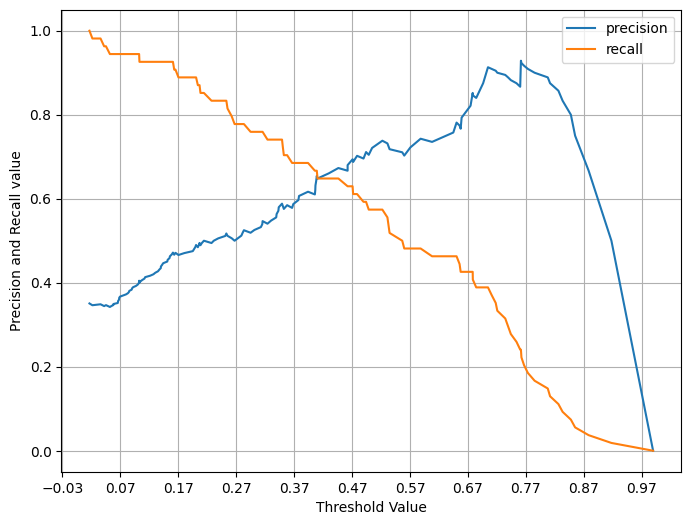

In [ ]:
# 정밀도 재현율 곡선
pred_proba_c1=lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test,pred_proba_c1)

In [ ]:
# threshold=0.42로 낮추면 정밀도, 재현율 어느 정도 균형 있음
# 그러나, 임곗값=0.42일 때 두 지표의 값이 모두 낮은 편

In [ ]:
# 데이터 점검
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Glucose 포도당 수치=0인 경우 있음 (포도당 수치가 0일 수는 없다)

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

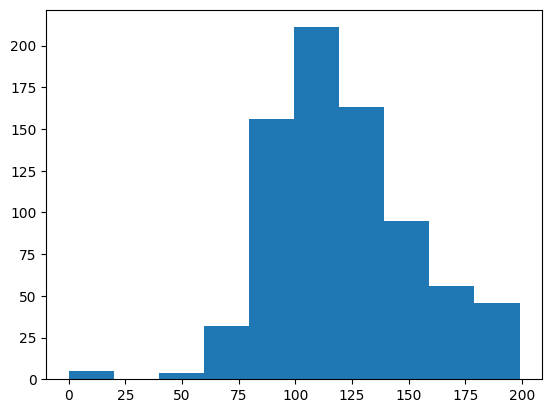

In [ ]:
plt.hist(diabetes_data['Glucose'], bins=10)

In [ ]:
# 0값 검사할 피처명 리스트
zero_features=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

# 전체 데이터 건수
total_count=diabetes_data['Glucose'].count()

# 피처별로 반복하며 데이터 값 0인 수 추출, 퍼센트 계산
for feature in zero_features:
  zero_count=diabetes_data[diabetes_data[feature]==0][feature].count()
  print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count,
                                          100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


In [ ]:
# SkinThickness, Insulin에서 0의 비중이 높음
# 전체 데이터 수 많지 않음 => 0을 평균값으로 대체함

In [ ]:
mean_zero_features=diabetes_data[zero_features].mean()
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0,mean_zero_features)

In [ ]:
X=diabetes_data.iloc[:,:-1]
y=diabetes_data.iloc[:,-1]

# StandardScaler 이용해서 피처 데이터 세트 스케일링
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습,예측,평가
lr_clf=LogisticRegression()
lr_clf.fit(X_train, y_train)
pred=lr_clf.predict(X_test)
pred_proba=lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)


오차행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,       F1: 0.6804, AUC: 0.8433


In [ ]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  # thresholds list 객체 내 값을 차례로 iteration하면서 평가
  for custom_threshold in thresholds:
    binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
    # Binarizer에 지정된 임곗값보다 크면 1, 작거나 같으면 0으로 변환됨
    custom_predict=binarizer.transform(pred_proba_c1)
    print('임곗값: ', custom_threshold)
    get_clf_eval(y_test, custom_predict, pred_proba_c1)
    # roc_auc_score 포함된 경우, 반드시 get_clf_eval(y_test, pred, pred_proba)에서 pred_proba값 입력해야함!


In [ ]:
thresholds=[0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba=lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값:  0.3
오차행렬
[[67 33]
 [11 43]]
정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963,       F1: 0.6615, AUC: 0.8433
임곗값:  0.33
오차행렬
[[72 28]
 [12 42]]
정확도: 0.7403, 정밀도: 0.6000, 재현율: 0.7778,       F1: 0.6774, AUC: 0.8433
임곗값:  0.36
오차행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222,       F1: 0.6667, AUC: 0.8433
임곗값:  0.39
오차행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037,       F1: 0.6667, AUC: 0.8433
임곗값:  0.42
오차행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667,       F1: 0.6792, AUC: 0.8433
임곗값:  0.45
오차행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667,       F1: 0.6857, AUC: 0.8433
임곗값:  0.48
오차행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481,       F1: 0.6931, AUC: 0.8433
임곗값:  0.5
오차행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,       F1: 0.6804, AUC: 0.8433


In [ ]:
# 임곗값을 0.48로 설정
binarizer=Binarizer(threshold=0.48)

# 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 칼럼값을 Binarizer 변환
pred_th_048=binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval(y_test, pred_th_048, pred_proba[:,1])

오차행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481,       F1: 0.6931, AUC: 0.8433
